In [79]:
# Import Dependencies
import json
import tweepy 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time 

In [80]:
# Import and Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [81]:
# Import Twitter API Keys
from config import consumer_key, consumer_secret, access_token, access_token_secret

In [82]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [83]:
# News Organization accounts 
news_organizations = "@CNN", "@BBC", "@CBS", "@FoxNews", "@nytimes"

# Variables for holding sentiments and setting counter
sentiments = []
counter = 1 

# Loop through tweets
for organization in news_organizations:
    tweet_number = 1

    # Get all tweets from home feed
    public_tweets = api.user_timeline(organization, count=100)

    # Loop through all tweets
    for tweet in public_tweets:
        print("Tweet %s: %s" % (counter, tweet["text"]))

        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        #Append into sentiment  
        sentiments.append({"Tweets Ago": tweet_number,
                          "Media Sources": organization,
                          "Text":tweet["text"],
                          "Date": tweet["created_at"],
                          "Compound": compound,
                          "Positive": pos,
                          "Neutral": neu,
                          "Negative": neg,
                           })
        tweet_number +=1
        counter +=1

Tweet 1: "Black Panther" passes "Titanic" at the box office on the all-time list of highest grossing films… https://t.co/igIIinGUCB
Tweet 2: There was no working smoke alarm in the Trump Tower apartment where a deadly fire started, a source says… https://t.co/KRMhPxaYvK
Tweet 3: The US will respond to the Assad regime's alleged chemical attack against Syrian civilians, US Ambassador Nikki Hal… https://t.co/Z0mO1CB2Nb
Tweet 4: Rep. Ruben Gallego: I'd like to remind the viewers, it's only Monday. So, God knows what's going to happen the rest… https://t.co/lUxMXkIUbe
Tweet 5: RT @CNNSitRoom: A source close to the White House says Mueller’s decision to raid the offices of Michael Cohen could well push the Presiden…
Tweet 6: The US Department of Justice announced that seven people associated with Backpage, a classified ads website, have b… https://t.co/9ljV0ps3PH
Tweet 7: Encourage moves toward religious freedom by Islamic leaders | By Johnnie Moore via @CNNOpinion… https://t.co/fkIMeCysCL


Tweet 101: In this five-part immersive living history series, the training programme of one of World War Two's most covert org… https://t.co/WMq4ME93CR
Tweet 102: When doctors found a large tumour on little Poppy’s brain, her parents faced one of the toughest decisions of their… https://t.co/bJp258jCaL
Tweet 103: Keep full and satisfied with these protein-filled, vegetarian dinners. 
Make double portions and save for lunch tom… https://t.co/yh3RGeC5i3
Tweet 104: RT @BBCScotland: The history behind #NationalUnicornDay 🦄

*may not be factually accurate* https://t.co/p44XmIXnoM
Tweet 105: RT @BBCTwo: Can you guess the city? #TheCityAndTheCity’s @davemorrissey64 and @MandiDhillon tried our game out for size… 🌆🏙🙃 https://t.co/U…
Tweet 106: The latest episode of @TheSimpsons has addressed controversy surrounding Indian character Apu for the first time.
👉… https://t.co/guqD0Pf53R
Tweet 107: 🏃‍♀️❤️ What a brilliant idea! https://t.co/QUVCwBptOU
Tweet 108: RT @BBCTheOneShow: Tonight on The One 

Tweet 201: Are you ready for a good time? Tomorrow, Elton John: I’m Still Standing - A GRAMMY®￼ Salute airs at 9/8c on CBS and… https://t.co/Z3Mnp1cJPa
Tweet 202: @edsheeran, @KeshaRose, @HaileeSteinfeld, @ActuallyNPH, and many more describe the impact that the music of Elton J… https://t.co/wBwzWcWGAa
Tweet 203: Lights will come on for @Jason_Aldean when he takes the stage to perform at the 53rd #ACMawards on Sunday, April 15… https://t.co/qPAbrFp4kQ
Tweet 204: Which state does @reba call home and which song was her first No. 1 single? Test your knowledge of the beloved coun… https://t.co/Sp8icKpFNu
Tweet 205: This just in! Thirteen-time ACM Award® winner @carrieunderwood will be performing her soon-to-be-released single li… https://t.co/GEyjt4lFbb
Tweet 206: It's time to celebrate! @MomCBS will be back for Season 6! https://t.co/ianxp6JWHq
Tweet 207: @OldDominion's Matthew Ramsey is here with a friendly reminder - Country Music’s Party Of The Year® is just seven d… https://t.co/SFnXx

Tweet 301: Sperm whale swallows 64 pounds of trash, dies of 'gastric shock' https://t.co/rnR2s86dmo
Tweet 302: .@nikkihaley shames Syria after suspected chemical attack: 'We are on the edge of a dangerous precipice' https://t.co/7VGjt8AECI
Tweet 303: https://t.co/pqEhmLhD8g founders accused of promoting prostitution, money laundering https://t.co/bsmKbYq41U
Tweet 304: .@JesseBWatters on London mayor enacting new knife restrictions: “It’s turned into a joke...What if you’re just car… https://t.co/3GI5SHfDR7
Tweet 305: .@TheJuanWilliams on Parkland survivor blasting sheriff &amp; school: “From his perspective, even if we never settle th… https://t.co/UoSkfYKtb4
Tweet 306: .@FLGovScott's press secretary, 33, dies in Florida Keys boat crash https://t.co/u1Noj8mg4R
Tweet 307: FBI raids home, office of Trump attorney Michael Cohen, under scrutiny over Stormy Daniels payments - via… https://t.co/iEZix1mxgI
Tweet 308: .@kimguilfoyle on alleged chemical attack in Syria: “Now this is an opportun

Tweet 401: In the digestive tracts of leeches, scientists find evidence of elusive forest species https://t.co/sPCA3y7CoV
Tweet 402: RT @nytimesbooks: "When a male supervisor told Abbott that 'nice girls' don’t go to the Bowery, she replied: 'Buddy, I’m not a nice girl. I…
Tweet 403: The Museum of the City of New York will digitize hundreds of 19th-century playbills https://t.co/kdtPEMMvnn
Tweet 404: Only 10 women have given birth while serving in Congress. Tammy Duckworth is the first senator. https://t.co/fl5ejK0DVW
Tweet 405: A Brooklyn man's mind began to unravel after the police fatally shot his best friend. 10 years later, he died the s… https://t.co/eOOcJBjhZQ
Tweet 406: RT @ABarnardNYT: New court papers contend top Syrian security officials deliberately tracked &amp; killed journalist Marie Colvin in 2012, part…
Tweet 407: 🤫
https://t.co/ivXQVRb3TB
Tweet 408: RT @MarkLandler: “A pleasant guy can still end up urging someone to use nukes, just as an irascible guy can.” @peterbake

In [90]:
# Convert sentiments to DataFrame and view top five
sentiments_df = pd.DataFrame(sentiments)
sentiments_df = sentiments_df[["Tweets Ago",
                               "Text",
                               "Media Sources",
                               "Date",
                               "Compound",
                               "Positive",
                               "Neutral",
                               "Negative"]]
sentiments_df.head()

,Tweets Ago,Text,Media Sources,Date,Compound,Positive,Neutral,Negative
0,1,"""Black Panther"" passes ""Titanic"" at the box of...",@CNN,Mon Apr 09 22:33:52 +0000 2018,-0.0772,0.000,0.925,0.075
1,2,There was no working smoke alarm in the Trump ...,@CNN,Mon Apr 09 22:20:57 +0000 2018,-0.7184,0.000,0.682,0.318
2,3,The US will respond to the Assad regime's alle...,@CNN,Mon Apr 09 22:18:28 +0000 2018,-0.4767,0.000,0.853,0.147
3,4,Rep. Ruben Gallego: I'd like to remind the vie...,@CNN,Mon Apr 09 22:12:15 +0000 2018,0.5984,0.197,0.803,0.000
4,5,RT @CNNSitRoom: A source close to the White Ho...,@CNN,Mon Apr 09 22:08:33 +0000 2018,0.2732,0.087,0.913,0.000


In [91]:
# Amount of information in data frame
sentiments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Tweets Ago       500 non-null int64
Text             500 non-null object
Media Sources    500 non-null object
Date             500 non-null object
Compound         500 non-null float64
Positive         500 non-null float64
Neutral          500 non-null float64
Negative         500 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 31.3+ KB


In [86]:
# Saving the DataFrame into a csv file
sentiments_df.to_csv("twitter_sentiments.csv", index = False )

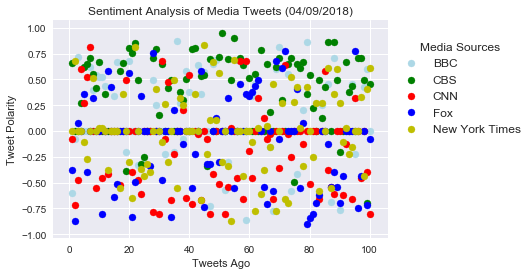

In [87]:
# Gathering the information from each media sources
BBC = sentiments_df.loc[sentiments_df["Media Sources"] == "@BBC"]
CBS = sentiments_df.loc[sentiments_df["Media Sources"] == "@CBS"]
CNN = sentiments_df.loc[sentiments_df["Media Sources"] == "@CNN"]
FOX = sentiments_df.loc[sentiments_df["Media Sources"] == "@FoxNews"]
NYT = sentiments_df.loc[sentiments_df["Media Sources"] == "@nytimes"]

# Creating scatter plots
plt.scatter(BBC['Tweets Ago'], BBC['Compound'], c ='lightblue', marker="o", label = 'BBC')
plt.scatter(CBS['Tweets Ago'], CBS['Compound'], c ='g', marker="o", label = 'CBS')
plt.scatter(CNN['Tweets Ago'], CNN['Compound'], c ='r', marker="o", label = 'CNN')
plt.scatter(FOX['Tweets Ago'], FOX['Compound'], c ='b', marker="o", label = 'Fox')
plt.scatter(NYT['Tweets Ago'], NYT['Compound'], c ='y', marker="o", label = 'New York Times')

# Plotting title and labels, and saving the figure into a png
sns.set()
plt.title("Sentiment Analysis of Media Tweets (%s)" % (time.strftime("%m/%d/%Y")))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(bbox_to_anchor = (1, 0.95), title = 'Media Sources', fontsize = 'medium')
plt.savefig("Sentiment Analysis of Media Tweets.png", bbox_inches = "tight")
sns.set
plt.show()

In [88]:
# Creating and displaying a new dataframe to group by Media Source and Compound score
new_score = pd.DataFrame(sentiments_df.groupby("Media Sources")["Compound"].mean())
new_score

,Compound
Media Sources,
@BBC,0.105501
@CBS,0.351076
@CNN,-0.135805
@FoxNews,-0.103604
@nytimes,-0.007027


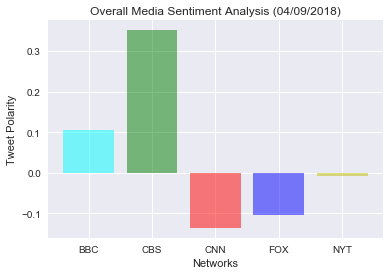

In [89]:
# Gathering and plotting of the compound score by news outlet and saving the image into png
x_axis = np.arange(len(new_score["Compound"]))
compound_score = new_score["Compound"]
tick_locations = [value+0.4 for value in x_axis]
plt.xticks(tick_locations, ["BBC", "CBS", "CNN", "FOX", "NYT"])
plt.bar(x_axis, compound_score, color = ['cyan','g','r','b','y'], alpha = 0.5, align = "edge")
plt.xlabel("Networks")
plt.ylabel("Tweet Polarity")
plt.title("Overall Media Sentiment Analysis (%s)" % (time.strftime("%m/%d/%Y")))
plt.savefig("Overall Media Sentiment Analysis.png", bbox_inches = "tight")
sns.set()
plt.show()